# Data cleaning 

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('../assets/data/test.csv')

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Handle missing values for categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with NaN to match the original length
        df[col] = df[col].where((df[col] >= lower_bound) & (df[col] <= upper_bound), np.nan)
    return df

# Apply outlier removal
data = remove_outliers(data, numeric_cols)

# Impute missing values (including outliers treated as NaN) with median
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Save the cleaned data
data.to_csv('../assets/data/cleaned_test_data.csv', index=False)

print("Data cleaning complete. Cleaned data saved as 'cleaned_data.csv'")


/tmp/ipykernel_30932/849268080.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_30932/849268080.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Data cleaning complete. Cleaned data saved as 'cleaned_data.csv'


In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your train and test datasets
train_df = pd.read_csv('../assets/data/train.csv')  
test_df = pd.read_csv('../assets/data/test.csv')    

# Assuming the 'promotions' column exists in both datasets
# Combine both datasets with a new column that indicates whether the data is from the train or test set
train_df['train_test_split'] = 'train'
test_df['train_test_split'] = 'test'

# Concatenate the two datasets into one
df = pd.concat([train_df, test_df], axis=0)

# Create a contingency table for the promotions column
contingency_table = pd.crosstab(df['train_test_split'], df['Promo'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
if p < 0.05:
    print("The distribution of promotions is significantly different between training and test sets (p-value = {:.4f})".format(p))
else:
    print("The distribution of promotions is similar between training and test sets (p-value = {:.4f})".format(p))


/tmp/ipykernel_73841/731706953.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../assets/data/train.csv')


The distribution of promotions is significantly different between training and test sets (p-value = 0.0000)


# data merging 

# Sales behavior before, during, and after holidays

In [ ]:
import pandas as pd

# Load data
file_path = '../assets/data/train.csv'
df = pd.read_csv(file_path)

# Filter only open stores
df = df[df['Open'] == 1]

# Identify holiday rows
holiday_rows = df[df['StateHoliday'] != '0']

# Define window size for "Before" and "After"
window_size = 7

# Create lists to store sales data
before_sales, during_sales, after_sales = [], [], []

# Loop through holiday rows
for idx in holiday_rows.index:
    # Extract sales for before, during, and after periods
    before = df.iloc[max(0, idx - window_size):idx]['Sales'].mean()
    during = df.iloc[idx:idx + 1]['Sales'].mean()
    after = df.iloc[idx + 1:idx + 1 + window_size]['Sales'].mean()
    
    before_sales.append(before)
    during_sales.append(during)
    after_sales.append(after)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Holiday': holiday_rows['StateHoliday'].values,
    'BeforeSales': before_sales,
    'DuringSales': during_sales,
    'AfterSales': after_sales
})

print(summary)

# Optional: Visualize
summary[['BeforeSales', 'DuringSales', 'AfterSales']].plot(kind='bar', figsize=(10, 6))


/tmp/ipykernel_11568/2843297898.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


       Holiday  BeforeSales  DuringSales   AfterSales
0            a  6791.857143       5680.0  6390.000000
1            a  6249.000000       6820.0  6499.714286
2            a  6536.142857       7623.0  8495.857143
3            a  7137.000000       5717.0  8688.571429
4            a  6982.857143       5599.0  8152.714286
...        ...          ...          ...          ...
113045       a          NaN          NaN          NaN
113046       a          NaN          NaN          NaN
113047       a          NaN          NaN          NaN
113048       a          NaN          NaN          NaN
113049       a          NaN          NaN          NaN

[113050 rows x 4 columns]


In [13]:
import pandas as pd

# Load your dataset
train = pd.read_csv('../assets/data/store.csv')  # Replace with your actual file path

# Print the column names
print(train.columns)


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


# Seasonal (Christmas, Easter, etc) purchase behaviors,

/tmp/ipykernel_6242/1831344661.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../assets/data/train.csv')


  Holiday     AvgSales
0       0  6701.492117
1       0  6992.158856
2       a  8487.471182
3       b  9887.889655
4       c  9743.746479
Holiday
0    2
a    1
b    1
c    1
Name: count, dtype: int64


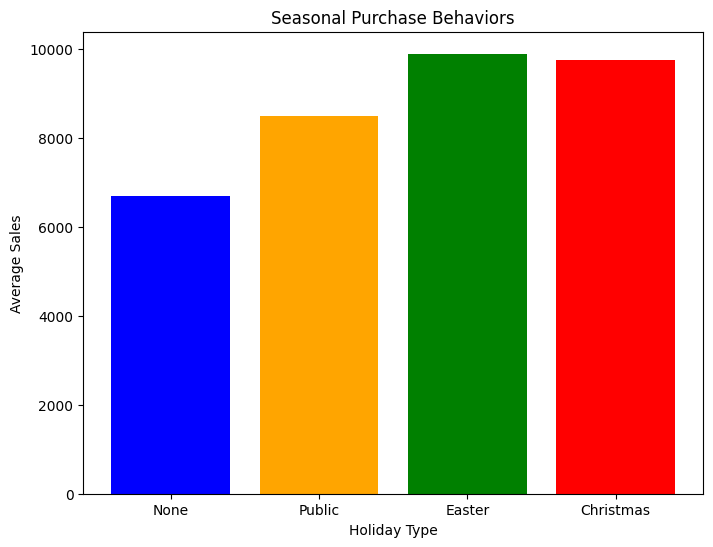

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../assets/data/train.csv')

# Filter for open stores
df = df[df['Open'] == 1]

# Group data by StateHoliday and calculate average sales
holiday_sales = df.groupby('StateHoliday')['Sales'].mean().reset_index()

# Rename columns for clarity
holiday_sales.columns = ['Holiday', 'AvgSales']

# Display results
print(holiday_sales)

# Convert 'Holiday' to string type (if not already)
holiday_sales['Holiday'] = holiday_sales['Holiday'].astype(str)

# Filter out unexpected or missing categories (e.g., NaN, empty strings)
filtered_sales = holiday_sales[holiday_sales['Holiday'].isin(['0', 'a', 'b', 'c'])]

#Check the unique values and counts in the 'StateHoliday' column
holiday_counts = holiday_sales['Holiday'].value_counts()
print(holiday_counts)

# If there are duplicates, remove them by keeping the first occurrence for each holiday type
holiday_sales = holiday_sales.drop_duplicates(subset=['Holiday'])

# Map holiday codes to human-readable labels
holiday_labels = {
    '0': 'None',
    'a': 'Public',
    'b': 'Easter',
    'c': 'Christmas'
}

# Filter only relevant holidays (0, a, b, c)
holiday_sales = holiday_sales[holiday_sales['Holiday'].isin(holiday_labels.keys())]
# Generate numerical indices for the x-axis
x_indices = range(len(holiday_sales['Holiday']))



# Plot seasonal behaviors
plt.figure(figsize=(8, 6))
plt.bar(holiday_sales['Holiday'], holiday_sales['AvgSales'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.title('Seasonal Purchase Behaviors')
plt.xticks(ticks=range(len(holiday_sales['Holiday'])), labels=['None', 'Public', 'Easter', 'Christmas'])
plt.show()


# correlation between sales and customers 

In [29]:
import pandas as pd
df = pd.read_csv('../assets/data/train.csv')
correlation = df['Sales'].corr(df['Customers'])
print(f"Correlation between Sales and Customers: {correlation}")


Correlation between Sales and Customers: 0.8947107733017032


/tmp/ipykernel_6242/3091755805.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../assets/data/train.csv')


# Visualization of correlations 

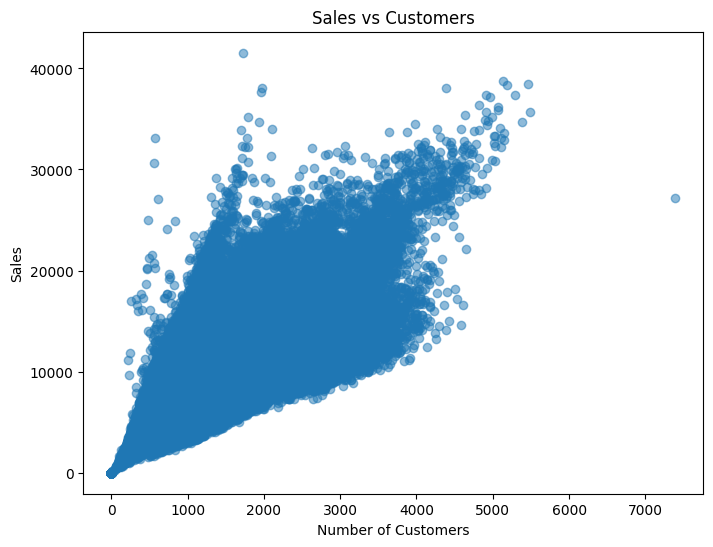

In [30]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between sales and customers
plt.figure(figsize=(8, 6))
plt.scatter(df['Customers'], df['Sales'], alpha=0.5)
plt.title('Sales vs Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


# Effect of Promotion 

In [3]:
import pandas as pd
df = pd.read_csv('../assets/data/train.csv')
correlation = df['Sales'].corr(df['Promo'])
print(f"Correlation between Promo and Sales: {correlation}")



Correlation between Promo and Sales: 0.45234471982402763


/tmp/ipykernel_23720/1247444641.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../assets/data/train.csv')


In [10]:
new_customers = df[df['Promo'] == 1]['Customers'].sum()
print(f"Total customers during promo: {new_customers}")


Total customers during promo: 318263948


# Stores should promos be deployed in

In [4]:
# Calculate average sales for stores with and without promo
promo_sales = df[df['Promo'] == 1]['Sales'].mean()
non_promo_sales = df[df['Promo'] == 0]['Sales'].mean()

print(f"Average Sales during Promo: {promo_sales}")
print(f"Average Sales without Promo: {non_promo_sales}")


Average Sales during Promo: 7991.152045969903
Average Sales without Promo: 4406.050805160786


In [5]:
# Calculate average number of customers for stores with and without promo
promo_customers = df[df['Promo'] == 1]['Customers'].mean()
non_promo_customers = df[df['Promo'] == 0]['Customers'].mean()

print(f"Average Customers during Promo: {promo_customers}")
print(f"Average Customers without Promo: {non_promo_customers}")


Average Customers during Promo: 820.0988146773861
Average Customers without Promo: 517.8235417537579


In [6]:
# Group by store and calculate average sales with and without promo
store_sales = df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
print(store_sales)


Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1115 rows x 2 columns]


# Trends of customer behavior during store opening and closing times

In [8]:
# Filter data when the store is open
open_data = df[df['Open'] == 1]

# Filter data when the store is closed
closed_data = df[df['Open'] == 0]

# Calculate average sales and customers when the store is open vs closed
open_sales_avg = open_data['Sales'].mean()
open_customers_avg = open_data['Customers'].mean()

closed_sales_avg = closed_data['Sales'].mean()
closed_customers_avg = closed_data['Customers'].mean()

print(f"Average sales when store is open: {open_sales_avg}")
print(f"Average customers when store is open: {open_customers_avg}")
print(f"Average sales when store is closed: {closed_sales_avg}")
print(f"Average customers when store is closed: {closed_customers_avg}")


Average sales when store is open: 6955.514290755952
Average customers when store is open: 762.7283951055907
Average sales when store is closed: 0.0
Average customers when store is closed: 0.0


Distribution of Assortment Types:
Assortment
a    593
c    513
b      9
Name: count, dtype: int64


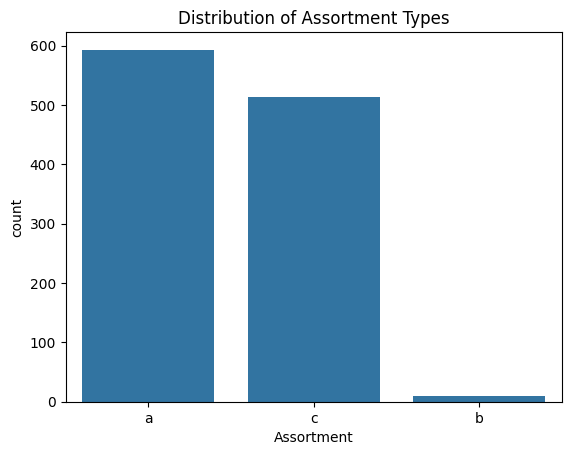


Average Promo2 Participation by Assortment Type:
Assortment
a    0.512648
b    0.444444
c    0.512671
Name: Promo2, dtype: float64


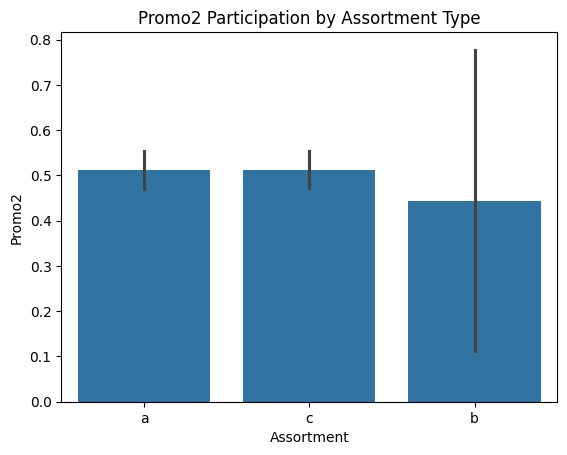


Average Competition Distance by Assortment Type:
Assortment
a    4400.338409
b    1177.777778
c    6638.769531
Name: CompetitionDistance, dtype: float64


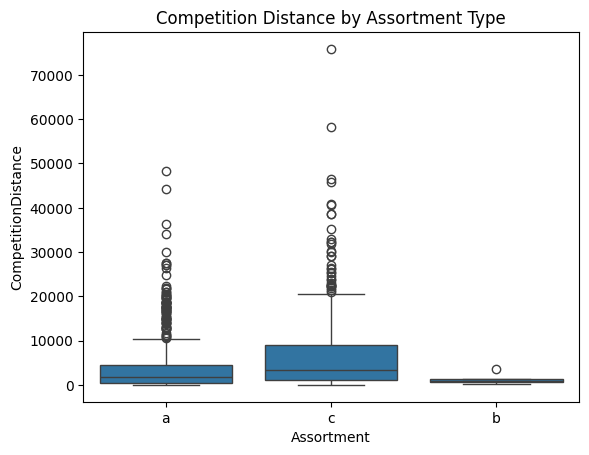


Store Type Distribution Across Assortment Types:
StoreType     a  b   c    d
Assortment                 
a           381  7  77  128
b             0  9   0    0
c           221  1  71  220


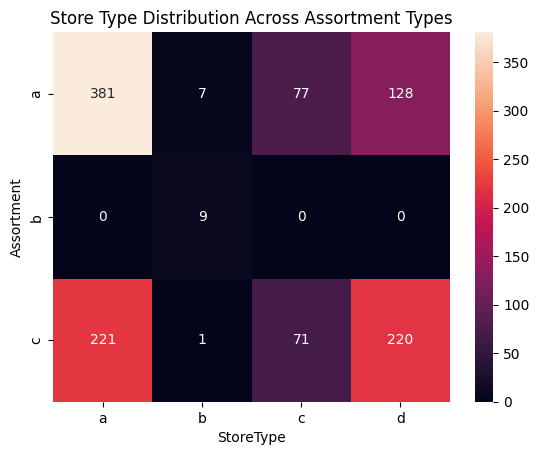


Average Year Promo2 Started by Assortment Type:
Assortment
a    2011.684211
b    2012.750000
c    2011.840304
Name: Promo2SinceYear, dtype: float64

Average Year Competitor Opened by Assortment Type:
Assortment
a    2008.365297
b    2003.000000
c    2009.137500
Name: CompetitionOpenSinceYear, dtype: float64


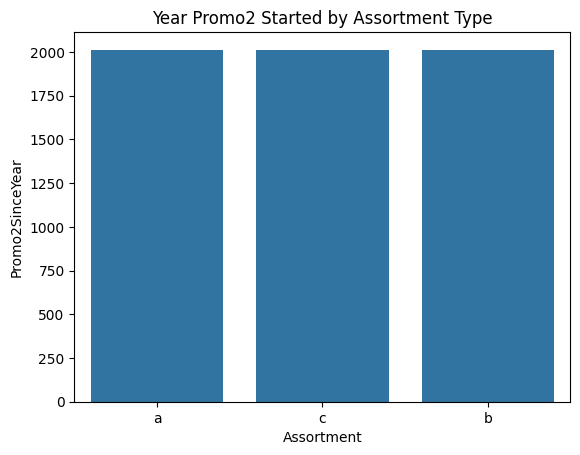

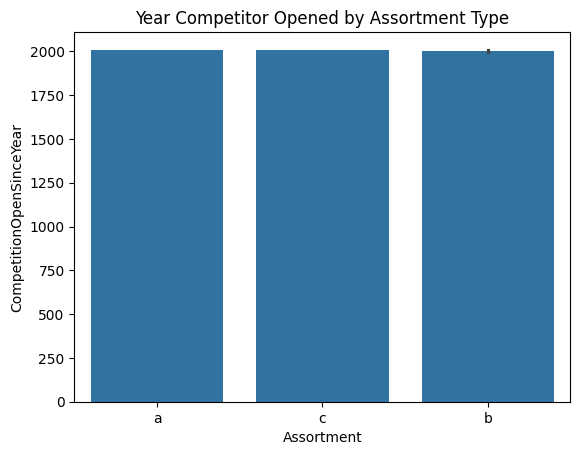

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../assets/data/store.csv')

# 1. Check the distribution of Assortment Types
assortment_counts = df['Assortment'].value_counts()
print("Distribution of Assortment Types:")
print(assortment_counts)

# Visualize the distribution of Assortment Types
sns.countplot(x='Assortment', data=df)
plt.title('Distribution of Assortment Types')
plt.show()

# 2. Group and Analyze Promo2 Participation by Assortment Type
promo2_by_assortment = df.groupby('Assortment')['Promo2'].mean()
print("\nAverage Promo2 Participation by Assortment Type:")
print(promo2_by_assortment)

# Visualize Promo2 Participation by Assortment Type
sns.barplot(x='Assortment', y='Promo2', data=df)
plt.title('Promo2 Participation by Assortment Type')
plt.show()

# 3. Analyze Competition Distance by Assortment Type
competition_by_assortment = df.groupby('Assortment')['CompetitionDistance'].mean()
print("\nAverage Competition Distance by Assortment Type:")
print(competition_by_assortment)

# Visualize Competition Distance by Assortment Type
sns.boxplot(x='Assortment', y='CompetitionDistance', data=df)
plt.title('Competition Distance by Assortment Type')
plt.show()

# 4. Explore the Store Types Across Assortments
store_type_assortment = pd.crosstab(df['Assortment'], df['StoreType'])
print("\nStore Type Distribution Across Assortment Types:")
print(store_type_assortment)

# Visualize the Store Type Distribution Across Assortments
sns.heatmap(store_type_assortment, annot=True, fmt="d")
plt.title('Store Type Distribution Across Assortment Types')
plt.show()

# 5. Analyze the Temporal Effects of Promo2 Start and Competitor Opening
# Analyze when Promo2 started by Assortment Type
promo2_start_by_assortment = df.groupby('Assortment')['Promo2SinceYear'].mean()
print("\nAverage Year Promo2 Started by Assortment Type:")
print(promo2_start_by_assortment)

# Analyze when the competition opened by Assortment Type
competition_open_by_assortment = df.groupby('Assortment')['CompetitionOpenSinceYear'].mean()
print("\nAverage Year Competitor Opened by Assortment Type:")
print(competition_open_by_assortment)

# Visualize the Temporal Effects of Promo2 Start by Assortment Type
sns.barplot(x='Assortment', y='Promo2SinceYear', data=df)
plt.title('Year Promo2 Started by Assortment Type')
plt.show()

# Visualize the Temporal Effects of Competition Open Year by Assortment Type
sns.barplot(x='Assortment', y='CompetitionOpenSinceYear', data=df)
plt.title('Year Competitor Opened by Assortment Type')
plt.show()
